In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#input data
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

#output data
y=df['Exited']

In [7]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<AxesSubplot:xlabel='Exited', ylabel='count'>

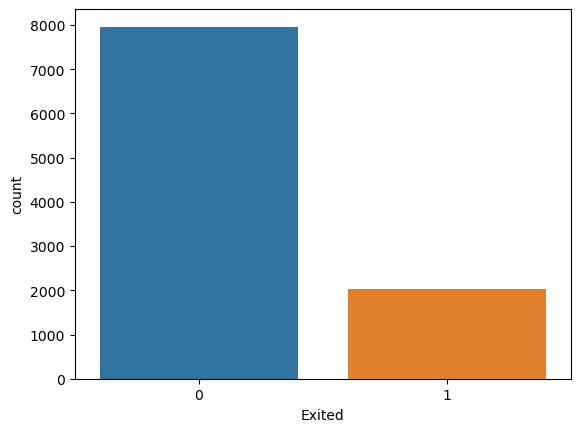

In [8]:
sns.countplot(x=y)

In [9]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros=RandomOverSampler(random_state=0)

In [13]:
x_res,y_res=ros.fit_resample(x,y)

In [14]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [17]:
x_scaled

array([[0.538     , 0.32432432, 0.2       , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.32432432, 0.8       , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.13513514, 0.4       , ..., 1.        , 0.        ,
        0.19091423]])

In [18]:
#Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.25, random_state = 0)

In [19]:
x_test.shape

(3982, 8)

In [20]:
x_train.shape

(11944, 8)

In [21]:
x_res.shape

(15926, 8)

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100)

In [24]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [25]:
y_pred=ann.predict(x_test)

In [26]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

In [28]:
y_test.value_counts()

1    2001
0    1981
Name: Exited, dtype: int64

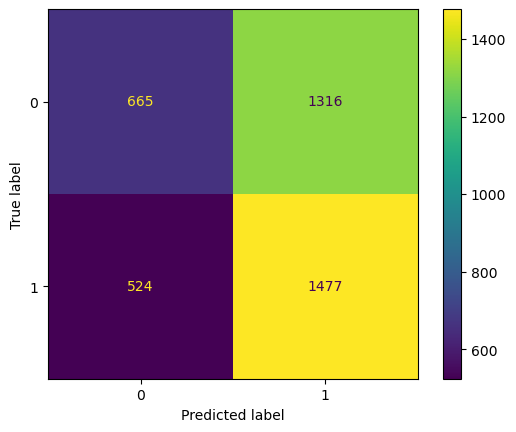

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)